<a href="https://colab.research.google.com/github/CherutoSharleen/Data-Science-2/blob/main/Share_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Morningstar bank data set

Bank names

*   Bank of America
*   CitiGroup
*   Goldman Sachs
*   JPMorgan Chase
*   Morgan Stanley
*   Wells Fargo

https://www.kaggle.com/code/rahulmallik1004/exploratory-data-analysis-of-stock-prices

In [2]:
# Import the necessary libraries

# Preprocessing
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.graph_objects as go
import plotly.express as px

# Handling dates
import datetime
from datetime import date, timedelta

In [4]:
# Reading the data
df = pd.read_pickle('all_banks.pickle')

df.head()

Bank Ticker    BAC                                       C                \
Stock Info   Close   High    Low   Open      Volume  Close   High    Low   
Date                                                                       
2006-01-02   46.15  46.36  45.91  46.02         0.0  485.3  487.1  482.2   
2006-01-03   47.08  47.18  46.15  46.92  16197900.0  492.9  493.8  481.1   
2006-01-04   46.58  47.24  46.45  47.00  17427400.0  483.8  491.0  483.5   
2006-01-05   46.64  46.83  46.32  46.58  14668900.0  486.2  487.8  484.0   
2006-01-06   46.57  46.91  46.35  46.80  11965700.0  486.2  489.0  482.0   

Bank Ticker                    ...       MS                             \
Stock Info    Open     Volume  ...    Close     High      Low     Open   
Date                           ...                                       
2006-01-02   483.5        0.0  ...  47.1008  47.3333  46.7107  47.2751   
2006-01-03   490.0  1536700.0  ...  48.4041  48.5535  47.1008  47.4578   
2006-01-04   488.6  1852790.0  ...  48.4373  49.2093  48.4373  48.7278   
2006-01-05   484.4  1015470.0  ...  48.5701  48.6365  48.1634  48.6033   
2006-01-06   488.8  1358930.0  ...  48.6199  48.8524  48.1883  48.7860   

Bank Ticker                WFC                                      
Stock Info      Volume   Close    High     Low    Open      Volume  
Date                                                                
2006-01-02         0.0  31.415  31.535  31.215  31.415         0.0  
2006-01-03   6354408.0  31.900  31.975  31.195  31.600  11015000.0  
2006-01-04   9292188.0  31.530  31.820  31.365  31.800  10594000.0  
2006-01-05   6534262.0  31.495  31.555  31.310  31.500   9927600.0  
2006-01-06   8146445.0  31.680  31.775  31.385  31.580   8324000.0  

[5 rows x 30 columns]

In [5]:
df.tail()

Bank Ticker    BAC                                       C                    \
Stock Info   Close   High    Low   Open      Volume  Close     High      Low   
Date                                                                           
2018-04-24   30.19  30.86  30.00  30.46  81486781.0  69.12  70.6200  68.4001   
2018-04-25   30.14  30.34  29.80  30.09  65893478.0  69.36  69.7650  68.0500   
2018-04-26   30.07  30.28  29.99  30.04  45936713.0  69.18  69.5900  68.9000   
2018-04-27   30.15  30.21  29.97  29.99  47411234.0  68.99  69.4377  68.7400   
2018-04-30   29.92  30.43  29.92  30.27  55153947.0  68.27  69.5900  68.2500   

Bank Ticker                     ...     MS                                     \
Stock Info    Open      Volume  ...  Close    High     Low   Open      Volume   
Date                            ...                                             
2018-04-24   69.76  16233650.0  ...  53.07  54.615  52.435  53.96  10742663.0   
2018-04-25   68.77  16059671.0  ...  52.04  52.870  51.820  52.85  12622985.0   
2018-04-26   69.11  13829682.0  ...  52.20  52.600  51.670  52.01  14668929.0   
2018-04-27   69.00  10420057.0  ...  51.86  52.510  51.780  51.84   7784472.0   
2018-04-30   69.20  12237893.0  ...  51.62  52.500  51.580  52.18   8209733.0   

Bank Ticker    WFC                                     
Stock Info   Close    High     Low   Open      Volume  
Date                                                   
2018-04-24   52.51  53.745  52.180  52.95  23052062.0  
2018-04-25   53.11  53.490  51.925  52.44  20978459.0  
2018-04-26   52.44  53.110  52.255  52.99  17025831.0  
2018-04-27   52.36  52.940  52.205  52.28  12304308.0  
2018-04-30   51.96  53.050  51.960  52.56  17050544.0  

[5 rows x 30 columns]

In [6]:
df.describe().T

count          mean           std    min  \
Bank Ticker Stock Info                                              
BAC         Close       3216.0  2.207642e+01  1.405856e+01   3.14   
            High        3216.0  2.235651e+01  1.414859e+01   3.51   
            Low         3216.0  2.180907e+01  1.395612e+01   2.53   
            Open        3216.0  2.209783e+01  1.405705e+01   3.22   
            Volume      3216.0  1.205982e+08  1.171327e+08   0.00   
C           Close       3216.0  1.291202e+02  1.636566e+02  10.20   
            High        3216.0  1.308496e+02  1.651318e+02  10.70   
            Low         3216.0  1.275974e+02  1.623069e+02   9.70   
            Open        3216.0  1.293424e+02  1.637961e+02  10.20   
            Volume      3216.0  2.554540e+07  2.514574e+07   0.00   
GS          Close       3216.0  1.680542e+02  4.169000e+01  52.00   
            High        3216.0  1.699745e+02  4.179075e+01  54.54   
            Low         3216.0  1.660473e+02  4.166918e+01  47.41   
            Open        3216.0  1.680294e+02  4.174358e+01  54.00   
            Volume      3216.0  6.810726e+06  7.581704e+06   0.00   
JPM         Close       3216.0  5.306554e+01  1.891181e+01  15.90   
            High        3216.0  5.362231e+01  1.892299e+01  17.29   
            Low         3216.0  5.247707e+01  1.891314e+01  14.96   
            Open        3216.0  5.305491e+01  1.891594e+01  15.37   
            Volume      3216.0  2.683450e+07  2.279500e+07   0.00   
MS          Close       3216.0  3.535749e+01  1.470958e+01   9.20   
            High        3216.0  3.585937e+01  1.481555e+01  10.21   
            Low         3216.0  3.484280e+01  1.459484e+01   6.71   
            Open        3216.0  3.536594e+01  1.470945e+01   9.19   
            Volume      3216.0  1.599379e+07  1.548727e+07   0.00   
WFC         Close       3216.0  3.883257e+01  1.141940e+01   8.12   
            High        3216.0  3.924234e+01  1.136037e+01   8.94   
            Low         3216.0  3.841059e+01  1.148795e+01   7.80   
            Open        3216.0  3.883161e+01  1.141537e+01   8.65   
            Volume      3216.0  2.948810e+07  3.257191e+07   0.00   

                                 25%           50%           75%           max  
Bank Ticker Stock Info                                                          
BAC         Close       1.319000e+01  1.619000e+01  2.811750e+01  5.490000e+01  
            High        1.338735e+01  1.637250e+01  2.897000e+01  5.508000e+01  
            Low         1.300000e+01  1.601000e+01  2.763500e+01  5.482000e+01  
            Open        1.321375e+01  1.620000e+01  2.823500e+01  5.504000e+01  
            Volume      5.035463e+07  9.032568e+07  1.559008e+08  1.226791e+09  
C           Close       4.119750e+01  5.036500e+01  7.549250e+01  5.641000e+02  
            High        4.180000e+01  5.090500e+01  7.629122e+01  5.700000e+02  
            Low         4.066625e+01  4.992500e+01  7.466000e+01  5.555000e+02  
            Open        4.137500e+01  5.042500e+01  7.571000e+01  5.660000e+02  
            Volume      1.073983e+07  1.909709e+07  3.371273e+07  3.772638e+08  
GS          Close       1.455550e+02  1.651100e+02  1.918200e+02  2.733800e+02  
            High        1.474075e+02  1.666450e+02  1.935025e+02  2.753100e+02  
            Low         1.439250e+02  1.633700e+02  1.897935e+02  2.707700e+02  
            Open        1.457950e+02  1.650850e+02  1.917150e+02  2.743400e+02  
            Volume      2.890762e+06  4.460906e+06  7.848425e+06  1.145906e+08  
JPM         Close       4.075750e+01  4.700000e+01  6.024250e+01  1.187700e+02  
            High        4.135375e+01  4.746000e+01  6.077500e+01  1.193300e+02  
            Low         4.022750e+01  4.654000e+01  5.987500e+01  1.173500e+02  
            Open        4.081000e+01  4.702000e+01  6.036250e+01  1.189100e+02  
            Volume      1.282155e+07  1.958909e+07  3.374876e+07  2.172942e+08  
MS          Close       2.516750e+

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3216 entries, 2006-01-02 to 2018-04-30
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Close)   3216 non-null   float64
 1   (BAC, High)    3216 non-null   float64
 2   (BAC, Low)     3216 non-null   float64
 3   (BAC, Open)    3216 non-null   float64
 4   (BAC, Volume)  3216 non-null   float64
 5   (C, Close)     3216 non-null   float64
 6   (C, High)      3216 non-null   float64
 7   (C, Low)       3216 non-null   float64
 8   (C, Open)      3216 non-null   float64
 9   (C, Volume)    3216 non-null   float64
 10  (GS, Close)    3216 non-null   float64
 11  (GS, High)     3216 non-null   float64
 12  (GS, Low)      3216 non-null   float64
 13  (GS, Open)     3216 non-null   float64
 14  (GS, Volume)   3216 non-null   float64
 15  (JPM, Close)   3216 non-null   float64
 16  (JPM, High)    3216 non-null   float64
 17  (JPM, Low)     3216 non-null   flo

In [8]:
df.shape, df.columns

((3216, 30), MultiIndex([('BAC',  'Close'),
             ('BAC',   'High'),
             ('BAC',    'Low'),
             ('BAC',   'Open'),
             ('BAC', 'Volume'),
             (  'C',  'Close'),
             (  'C',   'High'),
             (  'C',    'Low'),
             (  'C',   'Open'),
             (  'C', 'Volume'),
             ( 'GS',  'Close'),
             ( 'GS',   'High'),
             ( 'GS',    'Low'),
             ( 'GS',   'Open'),
             ( 'GS', 'Volume'),
             ('JPM',  'Close'),
             ('JPM',   'High'),
             ('JPM',    'Low'),
             ('JPM',   'Open'),
             ('JPM', 'Volume'),
             ( 'MS',  'Close'),
             ( 'MS',   'High'),
             ( 'MS',    'Low'),
             ( 'MS',   'Open'),
             ( 'MS', 'Volume'),
             ('WFC',  'Close'),
             ('WFC',   'High'),
             ('WFC',    'Low'),
             ('WFC',   'Open'),
             ('WFC', 'Volume')],
            names=['Bank Ti

Stock Market Analysis means analyzing the current and historical trends in the stock market to make future buting and selling decisions

Steps: 
1. Checking prices at the start and the end of the day
2. Get highest and lowest prices
2. Using a candlestick chart to analyze the price movement of stock prices
3. Visualizing the data


In [16]:
#Finding Null Rows
#No nulls
df.isna().values.any()

False

In [ ]:
# Get the number of rows
previous_count = len(df.index)

duplicateRows = df.duplicated(keep=False)

print(f'Duplicated rows: \n \n {df[duplicateRows]}')


Duplicated rows: 
 
 Bank Ticker    BAC                                  C                       \
Stock Info   Close   High    Low   Open Volume  Close   High    Low   Open   
Date                                                                         
2007-01-01   53.39  53.78  53.25  53.65    0.0  557.0  560.9  555.5  558.5   
2007-01-02   53.39  53.78  53.25  53.65    0.0  557.0  560.9  555.5  558.5   
2012-10-29    9.12   9.12   9.12   9.12    0.0   36.6   36.6   36.6   36.6   
2012-10-30    9.12   9.12   9.12   9.12    0.0   36.6   36.6   36.6   36.6   

Bank Ticker         ...       MS                                     WFC  \
Stock Info  Volume  ...    Close     High     Low     Open Volume  Close   
Date                ...                                                    
2007-01-01     0.0  ...  67.5964  68.0696  67.447  67.5632    0.0  35.56   
2007-01-02     0.0  ...  67.5964  68.0696  67.447  67.5632    0.0  35.56   
2012-10-29     0.0  ...  17.0400  17.0400  17.040  1

In [ ]:
# Dropping the duplicates (IF NEED BE)
df = df.drop_duplicates()
print(f'{previous_count - len(df.index)} duplicates were dropped')

2 duplicates were dropped


In [ ]:
df[('BAC','High')]

Date
2006-01-02    46.36
2006-01-03    47.18
2006-01-04    47.24
2006-01-05    46.83
2006-01-06    46.91
              ...  
2018-04-24    30.86
2018-04-25    30.34
2018-04-26    30.28
2018-04-27    30.21
2018-04-30    30.43
Name: (BAC, High), Length: 3214, dtype: float64

## Doing some visualization

<Figure size 720x720 with 0 Axes>

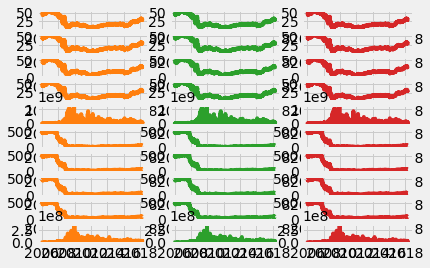

<Figure size 720x720 with 0 Axes>

In [ ]:
# Identifying outliers using scatterplots (to identify outliers)
fig, axs = plt.subplots(10, 3)
tabs = ['orange', 'green', 'red', 'blue']

for i , column in zip([i for i in range(0, 10)], df.columns):
  for j in range(0,3):
    axs[i][j].plot(df.index, df[column], f'tab:{tabs[j]}')    # tabs change the color of the plotted points

# plt.scatter(df['BAC']['High'].index, df['BAC']['High'].values)
# TODO: Tidy up the subplots

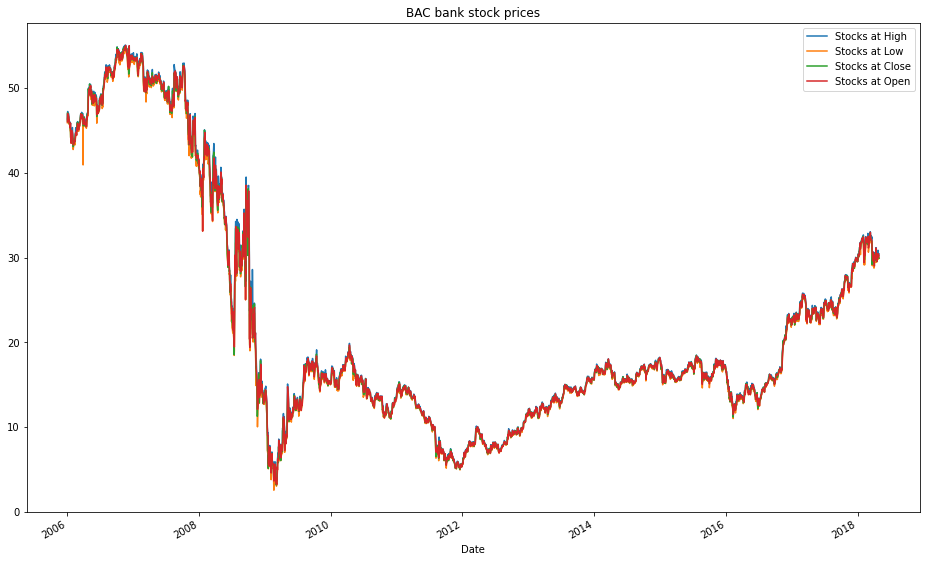

In [ ]:
df['BAC']['High'].plot(label='Stocks at High', figsize=(16,10))
df['BAC']['Low'].plot(label='Stocks at Low')
df['BAC']['Close'].plot(label='Stocks at Close')
df['BAC']['Open'].plot(label='Stocks at Open')
plt.legend()
plt.title('BAC bank stock prices')
plt.style.use('fivethirtyeight')
plt.show()

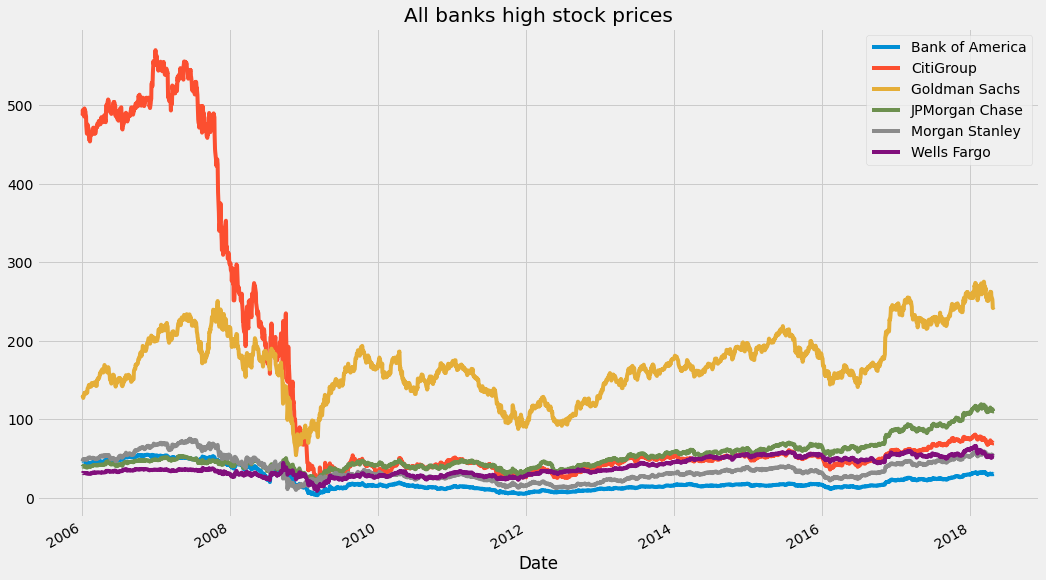

In [ ]:
# Comparison of high stock prices for different banks
df['BAC']['High'].plot(label='Bank of America', figsize=(16,10))
df['C']['High'].plot(label='CitiGroup')
df['GS']['High'].plot(label='Goldman Sachs')
df['JPM']['High'].plot(label='JPMorgan Chase')
df['MS']['High'].plot(label='Morgan Stanley')
df['WFC']['High'].plot(label='Wells Fargo')
plt.legend()
plt.title('All banks high stock prices')
plt.style.use('fivethirtyeight')
plt.show()

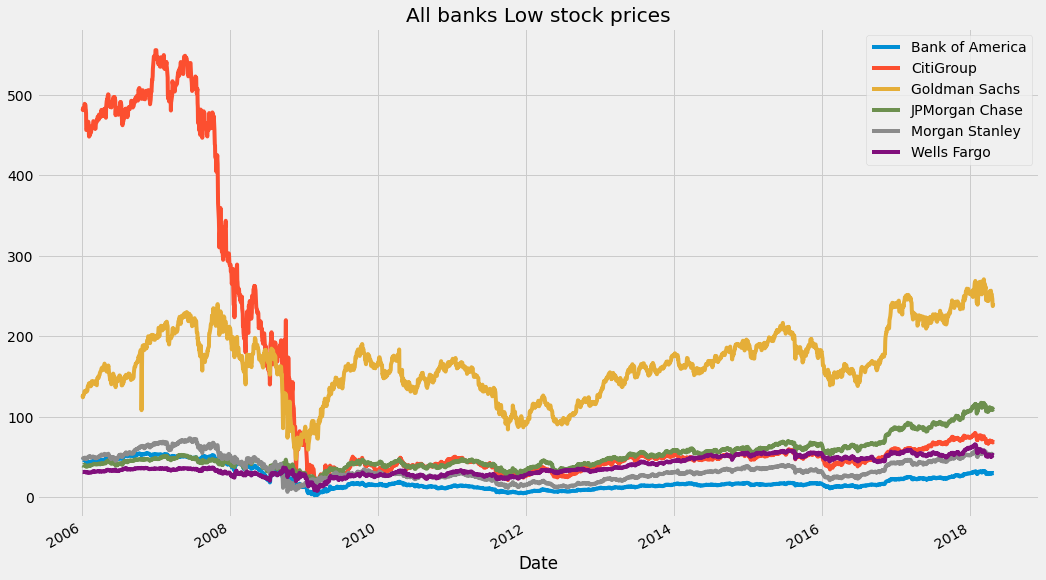

In [ ]:
# Comparison of Low stock prices for different banks
df['BAC']['Low'].plot(label='Bank of America', figsize=(16,10))
df['C']['Low'].plot(label='CitiGroup')
df['GS']['Low'].plot(label='Goldman Sachs')
df['JPM']['Low'].plot(label='JPMorgan Chase')
df['MS']['Low'].plot(label='Morgan Stanley')
df['WFC']['Low'].plot(label='Wells Fargo')
plt.legend()
plt.title('All banks Low stock prices')
plt.style.use('fivethirtyeight')
plt.show()

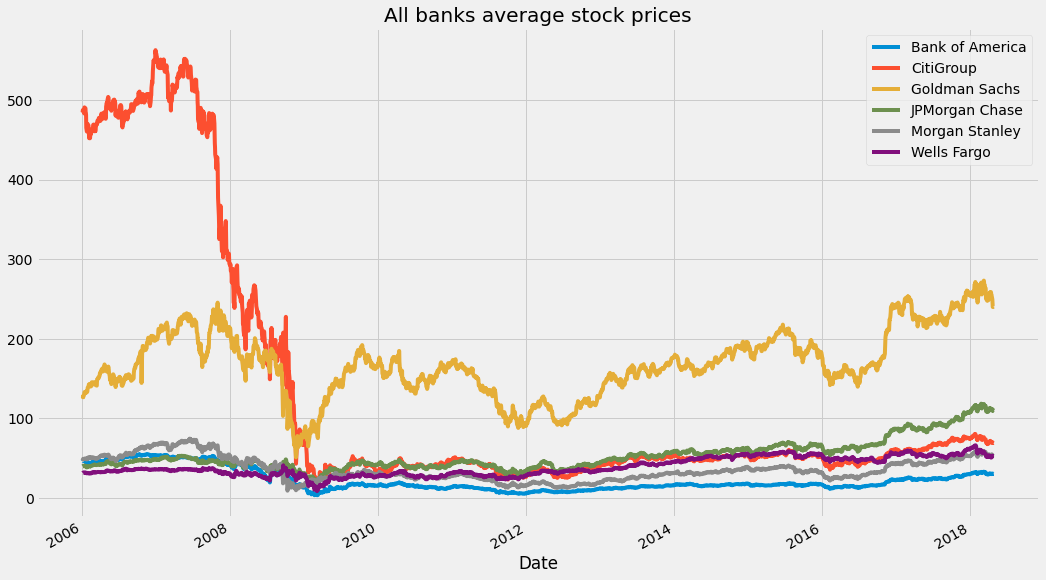

In [ ]:
# Comparison of average stock prices for different banks
((df['BAC']['High'] + df['BAC']['Low'])/2).plot(label='Bank of America', figsize=(16,10))
((df['C']['High'] + df['C']['Low'])/2).plot(label='CitiGroup')
((df['GS']['High'] + df['GS']['Low'])/2).plot(label='Goldman Sachs')
((df['JPM']['High'] + df['JPM']['Low'])/2).plot(label='JPMorgan Chase')
((df['MS']['High'] + df['MS']['Low'])/2).plot(label='Morgan Stanley')
((df['WFC']['High'] + df['WFC']['Low'])/2).plot(label='Wells Fargo')
plt.legend()
plt.title('All banks average stock prices')
plt.style.use('fivethirtyeight')
plt.show()